# Training Mushroom Detection Model 

## Importing Basic Libraries

In [1]:
# import default libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import torch

## Model Training 

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 535.7/931.0 GB disk)


In [3]:
from ultralytics import YOLO

### Small Model Training

The initial YOLOv8 model being trained was taken from the Computer Vision Project sample provided by the class, which was also the starting point for the training and hyperparameter refinement of the model. Additionally alterations to the data augmentation were made here before training the eventual training of the tiny model. 

In [4]:
mush_model = YOLO('yolov8s.pt')
mush_model.to('cuda')

100%|█████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:02<00:00, 9.17MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

This is the config file which lists the absolute paths to the data being used (if one needs to rerun this please replace the paths here), data augmentation parameters were added here as well as in the training arguments as the documentation was unclear on which location to add it, so same parameters were passed into both. 

The original dataset already had some augmentation done to the dataset like rotations, perspective shifts, cut-outs and other translation related augmentations, as such we felt we didn't need to augment those ourselves. The data augmentations being made here were primarily in the color, brightness, saturation to simulate the various and extreme weather and lighting conditions. 

In [5]:
%%writefile config.yaml
path: C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/Final Project/Mushroom-Detection-Model/mushroom-data
train: C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/Final Project/Mushroom-Detection-Model/mushroom-data/train
test: C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/Final Project/Mushroom-Detection-Model/mushroom-data/test
val: C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/Final Project/Mushroom-Detection-Model/mushroom-data/valid

# Classes
nc: 14 # replace based on your dataset's number of classes

# Class names
names:
  0: Amanita citrina
  1: Amanita hemibapha
  2: Amanita javanica
  3: Amanita pantherina
  4: Amanita princeps
  5: Boletus reticulatus
  6: Coltricia perennis
  7: Gyromitra infula
  8: Hygrophoropsis aurantiaca
  9: Imleria badia
  10: Lactarius turpis
  11: Russula emetica
  12: Suillus grevillei
  13: Suillus luteus

#data augmentations 
#color/light augmentations first
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.9  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.9  # image HSV-Value augmentation (fraction)

Overwriting config.yaml


In [15]:
#8th training 8 epochs changes for
mush_model.train(data="config.yaml",epochs=8,patience=5,batch=16, lr0=0.001, cos_lr=True,imgsz=640, hsv_h=0.015, hsv_s=0.9, hsv_v=0.9)

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=8, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 9.52MB/s]


AMP: checks passed 


train: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushr

train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\332medium_jpeg.rf.baa58533ff0ba2d9ddf04f10155d0bce.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0014]
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved



val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroo

val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      4.72G      1.337      2.952      1.542         55        640: 100%|██████████| 410/410 [01:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286       0.51      0.538      0.517      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8       4.8G      1.233      1.892      1.445         23        640: 100%|██████████| 410/410 [01:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.547      0.574       0.58      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8       4.8G      1.216      1.723      1.436         33        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.613      0.593      0.626      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      4.78G      1.163       1.55      1.391         37        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286        0.7      0.675      0.731       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      4.79G      1.096      1.347      1.341         33        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.736      0.723      0.771      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      4.78G      1.036      1.194      1.304         41        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.817       0.75      0.829      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8       4.8G     0.9842      1.069      1.263         30        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.814      0.813      0.864      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      4.78G     0.9503     0.9823      1.243         39        640: 100%|██████████| 410/410 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07

                   all       1452       2286      0.824      0.846       0.89      0.664



8 epochs completed in 0.170 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 22.5MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08


                   all       1452       2286      0.824      0.847       0.89      0.665
       Amanita citrina        110        127      0.837      0.961      0.955      0.766
     Amanita hemibapha         58        125      0.844        0.8       0.89      0.657
      Amanita javanica         59        208      0.804      0.803      0.848      0.503
    Amanita pantherina        141        162      0.909      0.929      0.958      0.755
      Amanita princeps         58         77      0.714      0.812      0.782      0.608
   Boletus reticulatus        106        133      0.747      0.797      0.841       0.63
    Coltricia perennis        105        152      0.914      0.915      0.949      0.755
      Gyromitra infula        131        183      0.905      0.884       0.91      0.647
Hygrophoropsis aurantiaca        119        277       0.85      0.773      0.865       0.57
         Imleria badia        124        162      0.789      0.765      0.851      0.649
      Lactarius tu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021AA07E1670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [16]:
mush_model.val()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroo

val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:10


                   all       1452       2286      0.824      0.846      0.889      0.664
       Amanita citrina        110        127      0.837      0.953      0.954      0.766
     Amanita hemibapha         58        125      0.843        0.8      0.887      0.655
      Amanita javanica         59        208      0.796      0.803      0.847      0.501
    Amanita pantherina        141        162      0.904      0.927      0.958      0.755
      Amanita princeps         58         77      0.726      0.825      0.787      0.616
   Boletus reticulatus        106        133      0.748      0.801       0.84       0.63
    Coltricia perennis        105        152      0.916      0.921      0.949      0.754
      Gyromitra infula        131        183      0.905      0.882       0.91      0.646
Hygrophoropsis aurantiaca        119        277      0.849      0.773      0.865      0.568
         Imleria badia        124        162      0.784      0.763      0.851      0.647
      Lactarius tu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021A9CF15F40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

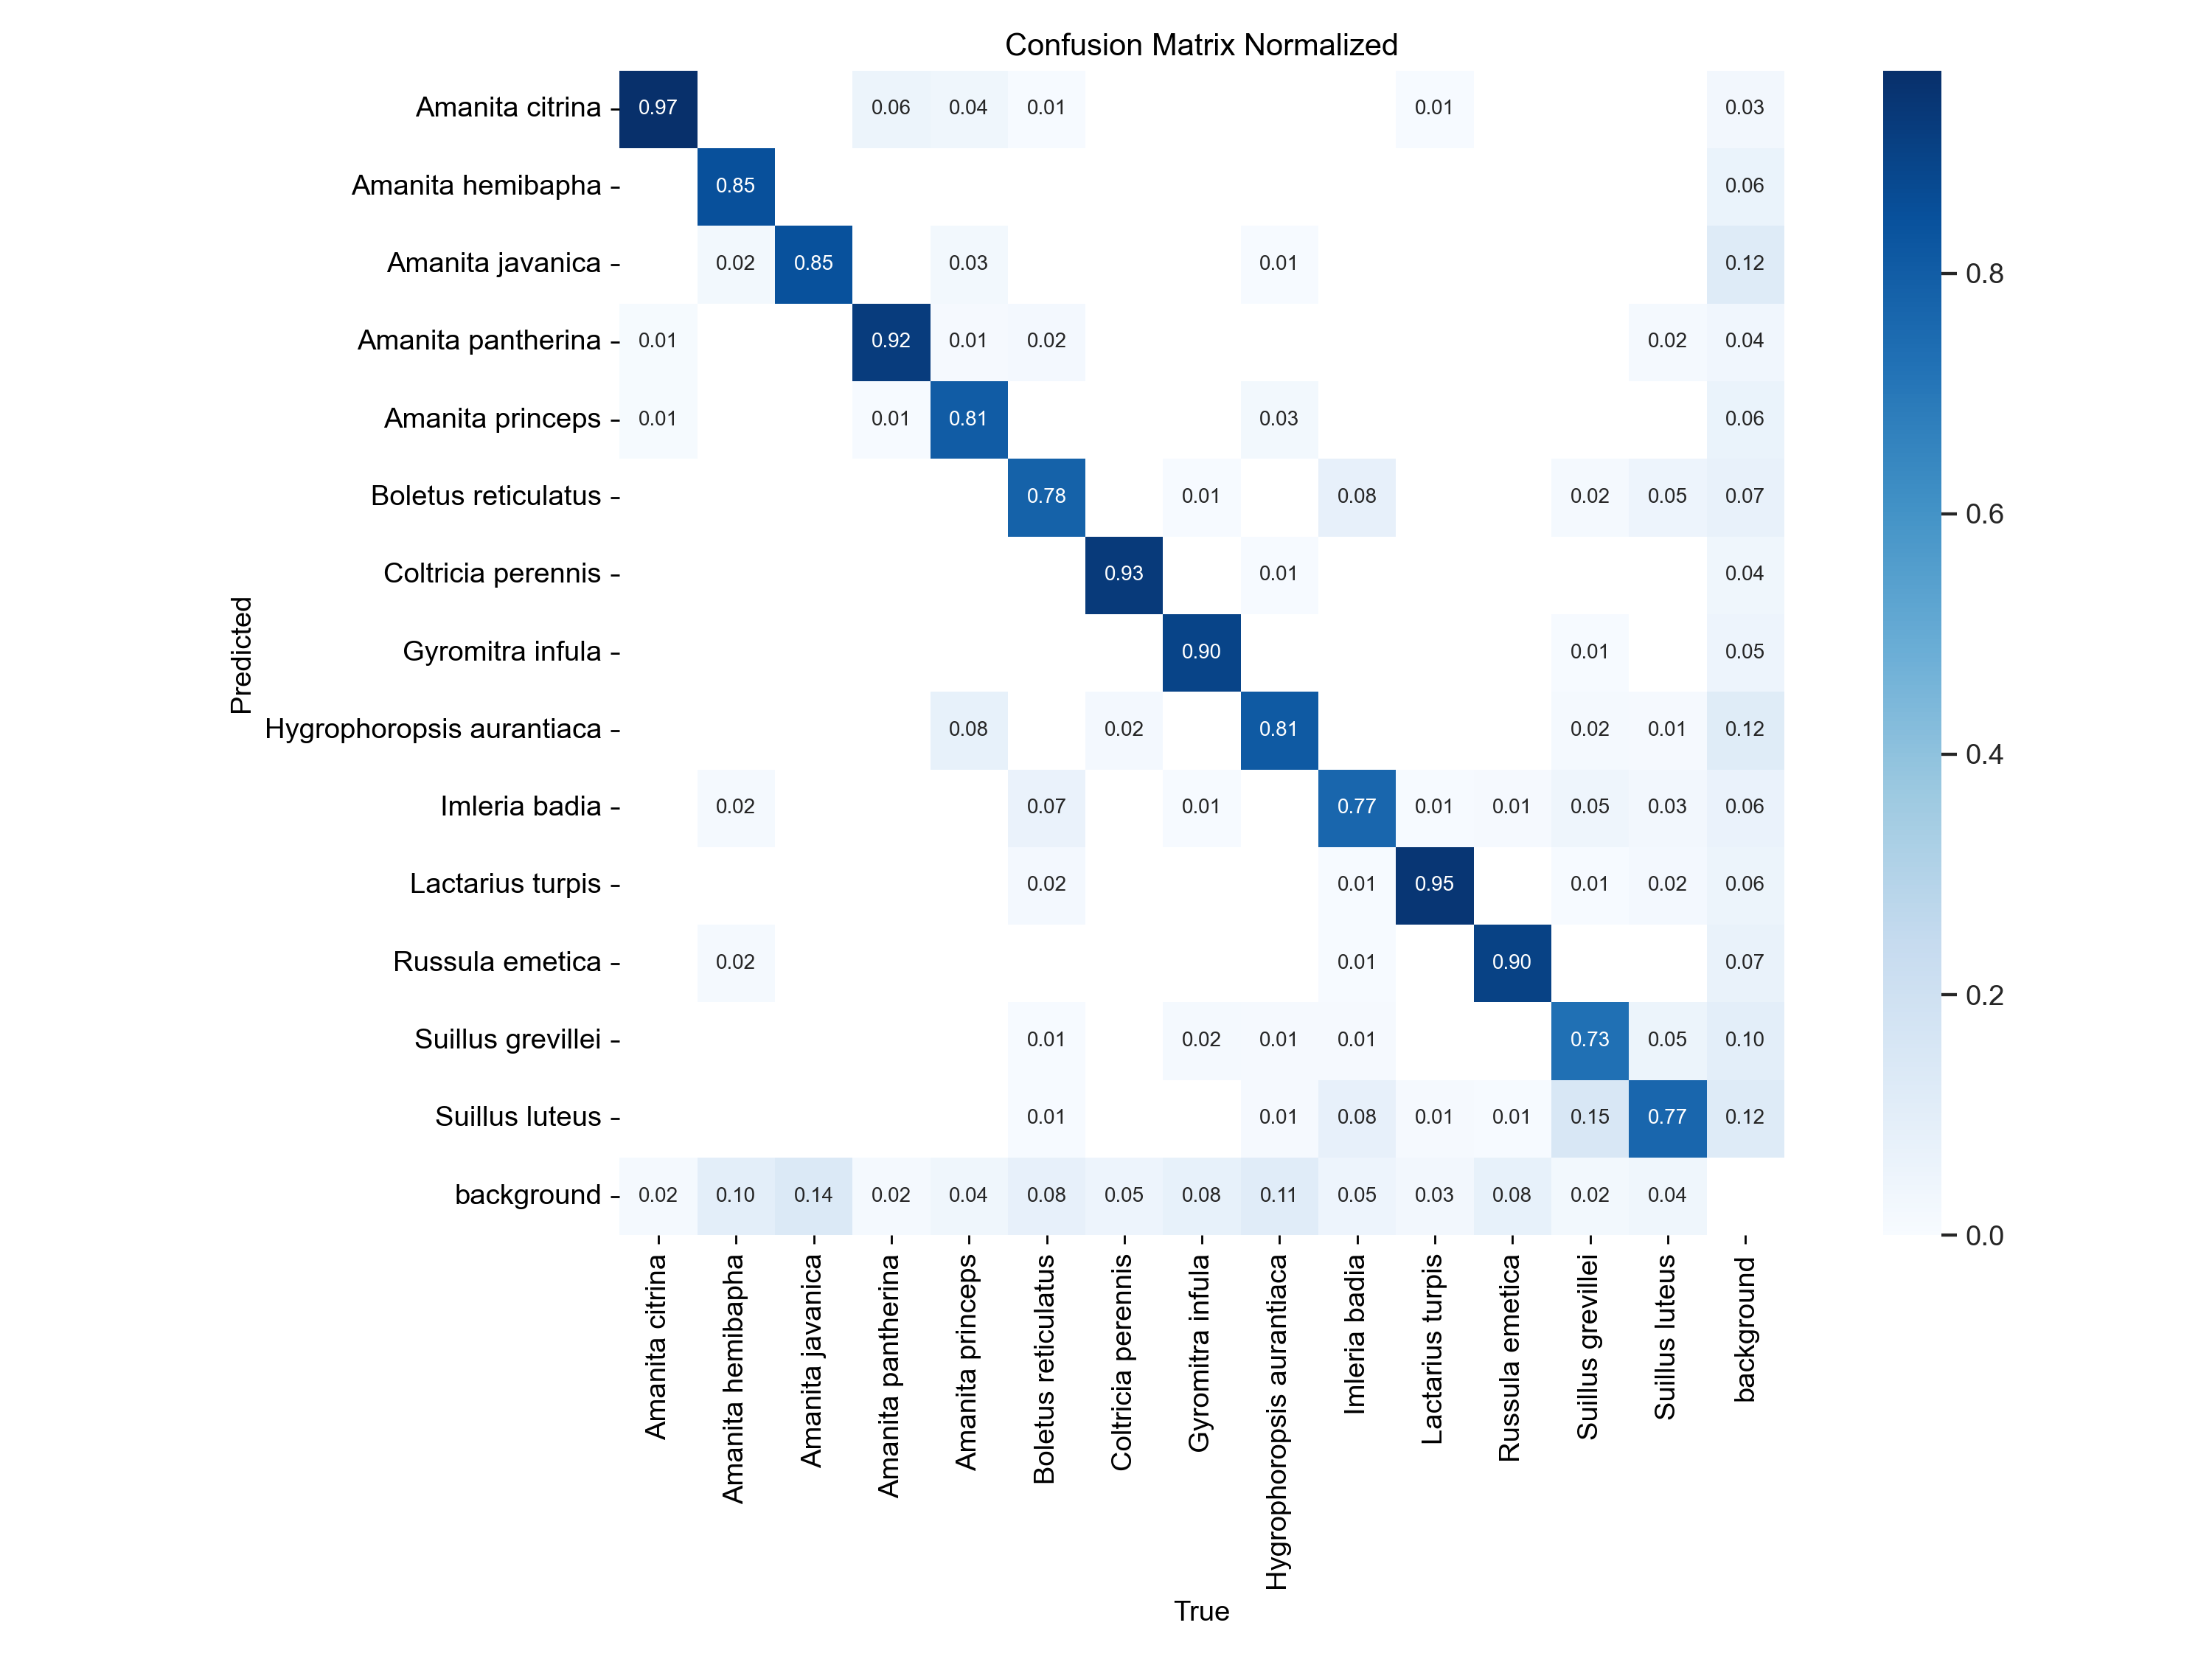

In [7]:
#Matrix for batch 16, lr0 0.001, cos_lr True, 8 epochs, 5 patience with data augmentation of 0.9 for hsv_s and hsv_v, and 0.015 for 
%matplotlib inline
from PIL import Image

Image.open('runs/detect/train112/confusion_matrix_normalized.png')

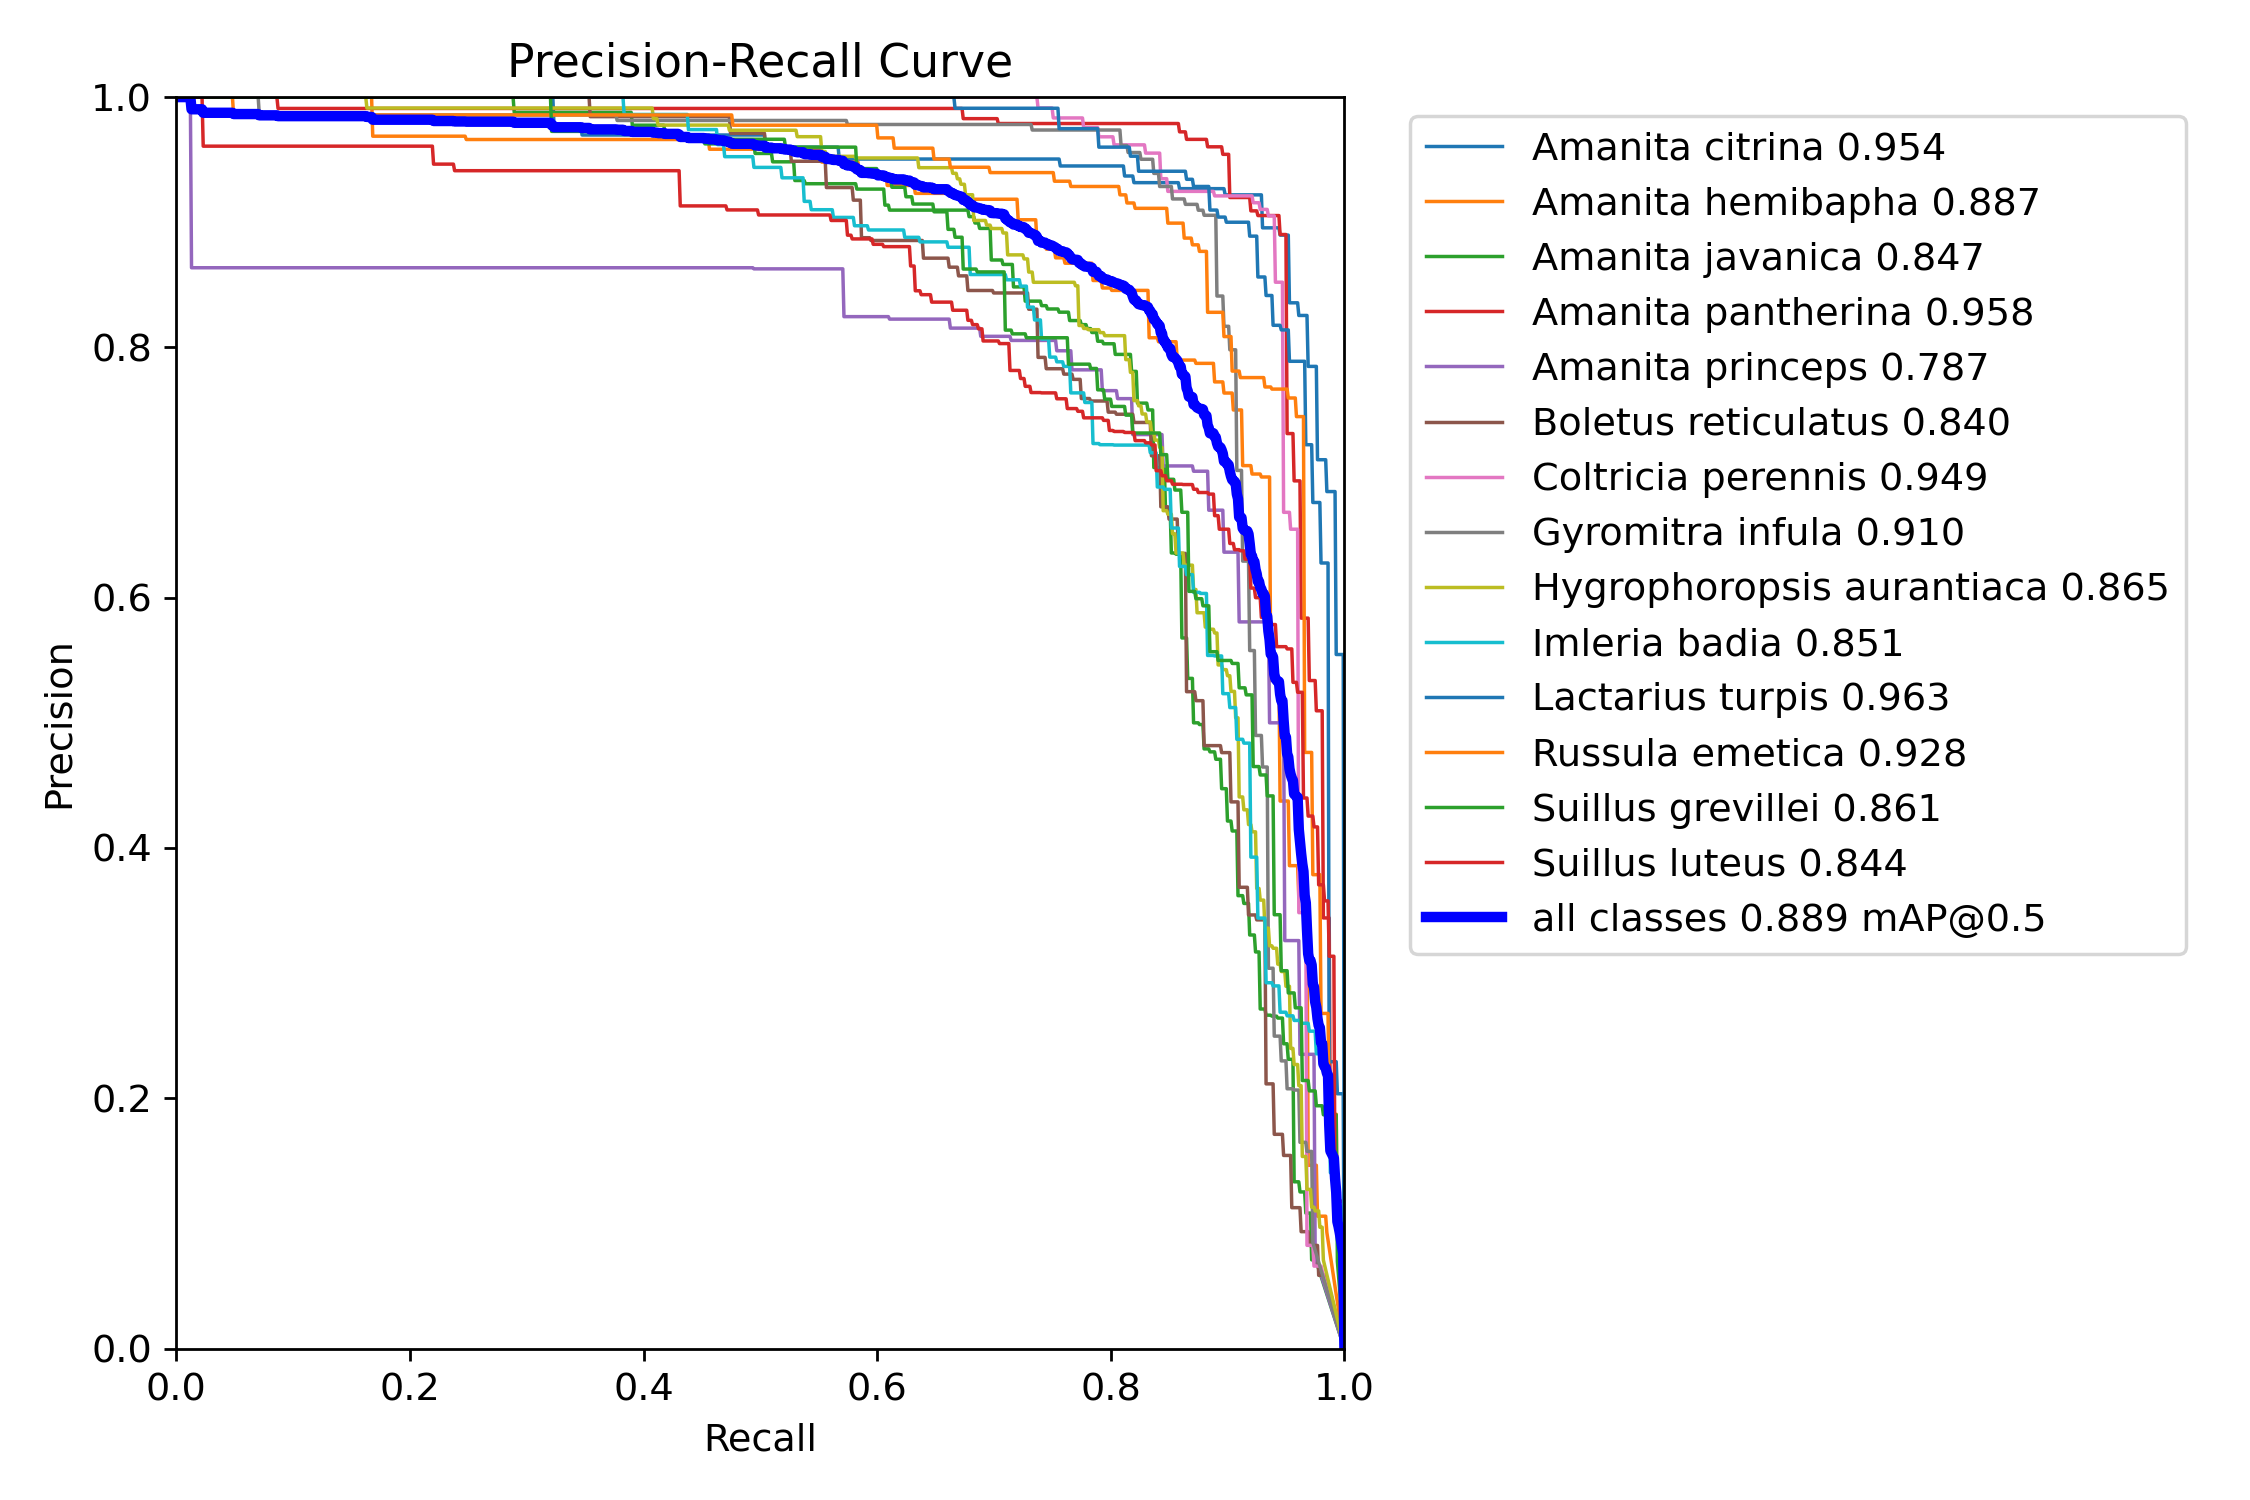

In [6]:
#PR Curve for batch 16, lr0 0.001, cos_lr True, 8 epochs, 5 patience with data augmentation of 0.9 for hsv_s and hsv_v, and 0.015 for 
%matplotlib inline
Image.open('runs/detect/train112/PR_curve.png')

### Tiny Yolo Model Training 

This version of the model was trained on the tiny version of YOLOv8 which is about 6MB in size compared to the ~20MB of the small version that was trained above. We were in the middle of training the small one when we notices that for the practical application of this project, the tiny version aoule probably need to be used as it is more suitible to mobile applications. As such while the small model will yield greater accuracy, the tiny one would be needed should this model be implemented in its desire context.

The training of that tiny version is shown below with slight alterations to the epochs from 8 to 14 to give the model more time to refine how it recognizes the different classes with a smaller architecture. 

In [7]:
mush_model = YOLO('yolov8n.pt')
mush_model.to('cuda')

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 10.7MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [8]:
#10th training 14 epochs with 3 patience to stop overfitting if no improvement after in 3 epochs for nano model
mush_model.train(data="config.yaml",epochs=14,patience=3,batch=16, lr0=0.001, cos_lr=True,imgsz=640, hsv_h=0.015, hsv_s=0.9, hsv_v=0.9)

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=14, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushr

train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\332medium_jpeg.rf.baa58533ff0ba2d9ddf04f10155d0bce.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0014]
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\train\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved



val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroo

val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 14 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/14      2.68G      1.322      3.347      1.565         55        640: 100%|██████████| 410/410 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06


                   all       1452       2286      0.264      0.459      0.316      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/14      2.61G      1.245      2.494      1.474         23        640: 100%|██████████| 410/410 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.465      0.513      0.457       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/14      2.57G      1.221      2.182      1.451         33        640: 100%|██████████| 410/410 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06


                   all       1452       2286      0.494       0.57      0.533      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/14      2.54G      1.203      1.949       1.43         37        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286       0.56      0.617      0.601      0.389


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/14      2.55G      1.158      1.816      1.451         18        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.608      0.604      0.627      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/14      2.53G      1.111      1.585      1.402         18        640: 100%|██████████| 410/410 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286       0.64      0.626      0.657      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/14      2.53G      1.059        1.4      1.357         13        640: 100%|██████████| 410/410 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.635      0.653      0.677      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/14      2.56G      1.023      1.297      1.324         19        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.696       0.69      0.738      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/14      2.55G     0.9843      1.176      1.296         22        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.732      0.724      0.783      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/14      2.53G     0.9438      1.053      1.253         15        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.764      0.749      0.804      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/14      2.53G     0.9204     0.9939      1.241         19        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.783      0.748      0.824      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/14      2.52G     0.8855     0.9011      1.213         15        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.795      0.793      0.846      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/14      2.55G     0.8699      0.871      1.196         21        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.813      0.785      0.849      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/14      2.55G     0.8509     0.8373       1.18         12        640: 100%|██████████| 410/410 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06

                   all       1452       2286      0.818      0.782      0.853      0.632



14 epochs completed in 0.211 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 6.2MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Model summary (fused): 168 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07


                   all       1452       2286      0.819      0.782      0.852      0.632
       Amanita citrina        110        127      0.846      0.955      0.956      0.788
     Amanita hemibapha         58        125        0.8      0.866      0.883      0.638
      Amanita javanica         59        208      0.809      0.731      0.807      0.449
    Amanita pantherina        141        162      0.932      0.844      0.946      0.759
      Amanita princeps         58         77      0.713      0.776      0.761      0.568
   Boletus reticulatus        106        133      0.735      0.722      0.794      0.608
    Coltricia perennis        105        152       0.89      0.862      0.917      0.722
      Gyromitra infula        131        183      0.936       0.82      0.891      0.623
Hygrophoropsis aurantiaca        119        277      0.822      0.733      0.819      0.534
         Imleria badia        124        162      0.777      0.642      0.805      0.612
      Lactarius tu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022F96F60080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [4]:
mush_model = YOLO('runs/detect/train15/weights/best.pt')
mush_model.val()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Model summary (fused): 168 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroo

val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\a80f02a3-7Gyromitrainfula4.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\Final Project\Mushroom-Detection-Model\mushroom-data\valid\images\fcefa0a6-7Gyromitrainfula5.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:08


                   all       1452       2286      0.822      0.784      0.853      0.632
       Amanita citrina        110        127      0.848      0.967      0.956      0.788
     Amanita hemibapha         58        125      0.802      0.875      0.885      0.643
      Amanita javanica         59        208      0.813      0.736      0.807      0.448
    Amanita pantherina        141        162      0.919      0.844      0.946      0.758
      Amanita princeps         58         77      0.728      0.766      0.756      0.556
   Boletus reticulatus        106        133      0.736      0.713      0.791      0.607
    Coltricia perennis        105        152       0.89      0.862      0.917      0.723
      Gyromitra infula        131        183       0.93       0.82      0.892      0.626
Hygrophoropsis aurantiaca        119        277      0.823      0.738       0.82      0.536
         Imleria badia        124        162      0.797      0.654      0.819       0.62
      Lactarius tu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001EDF8F7FE00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

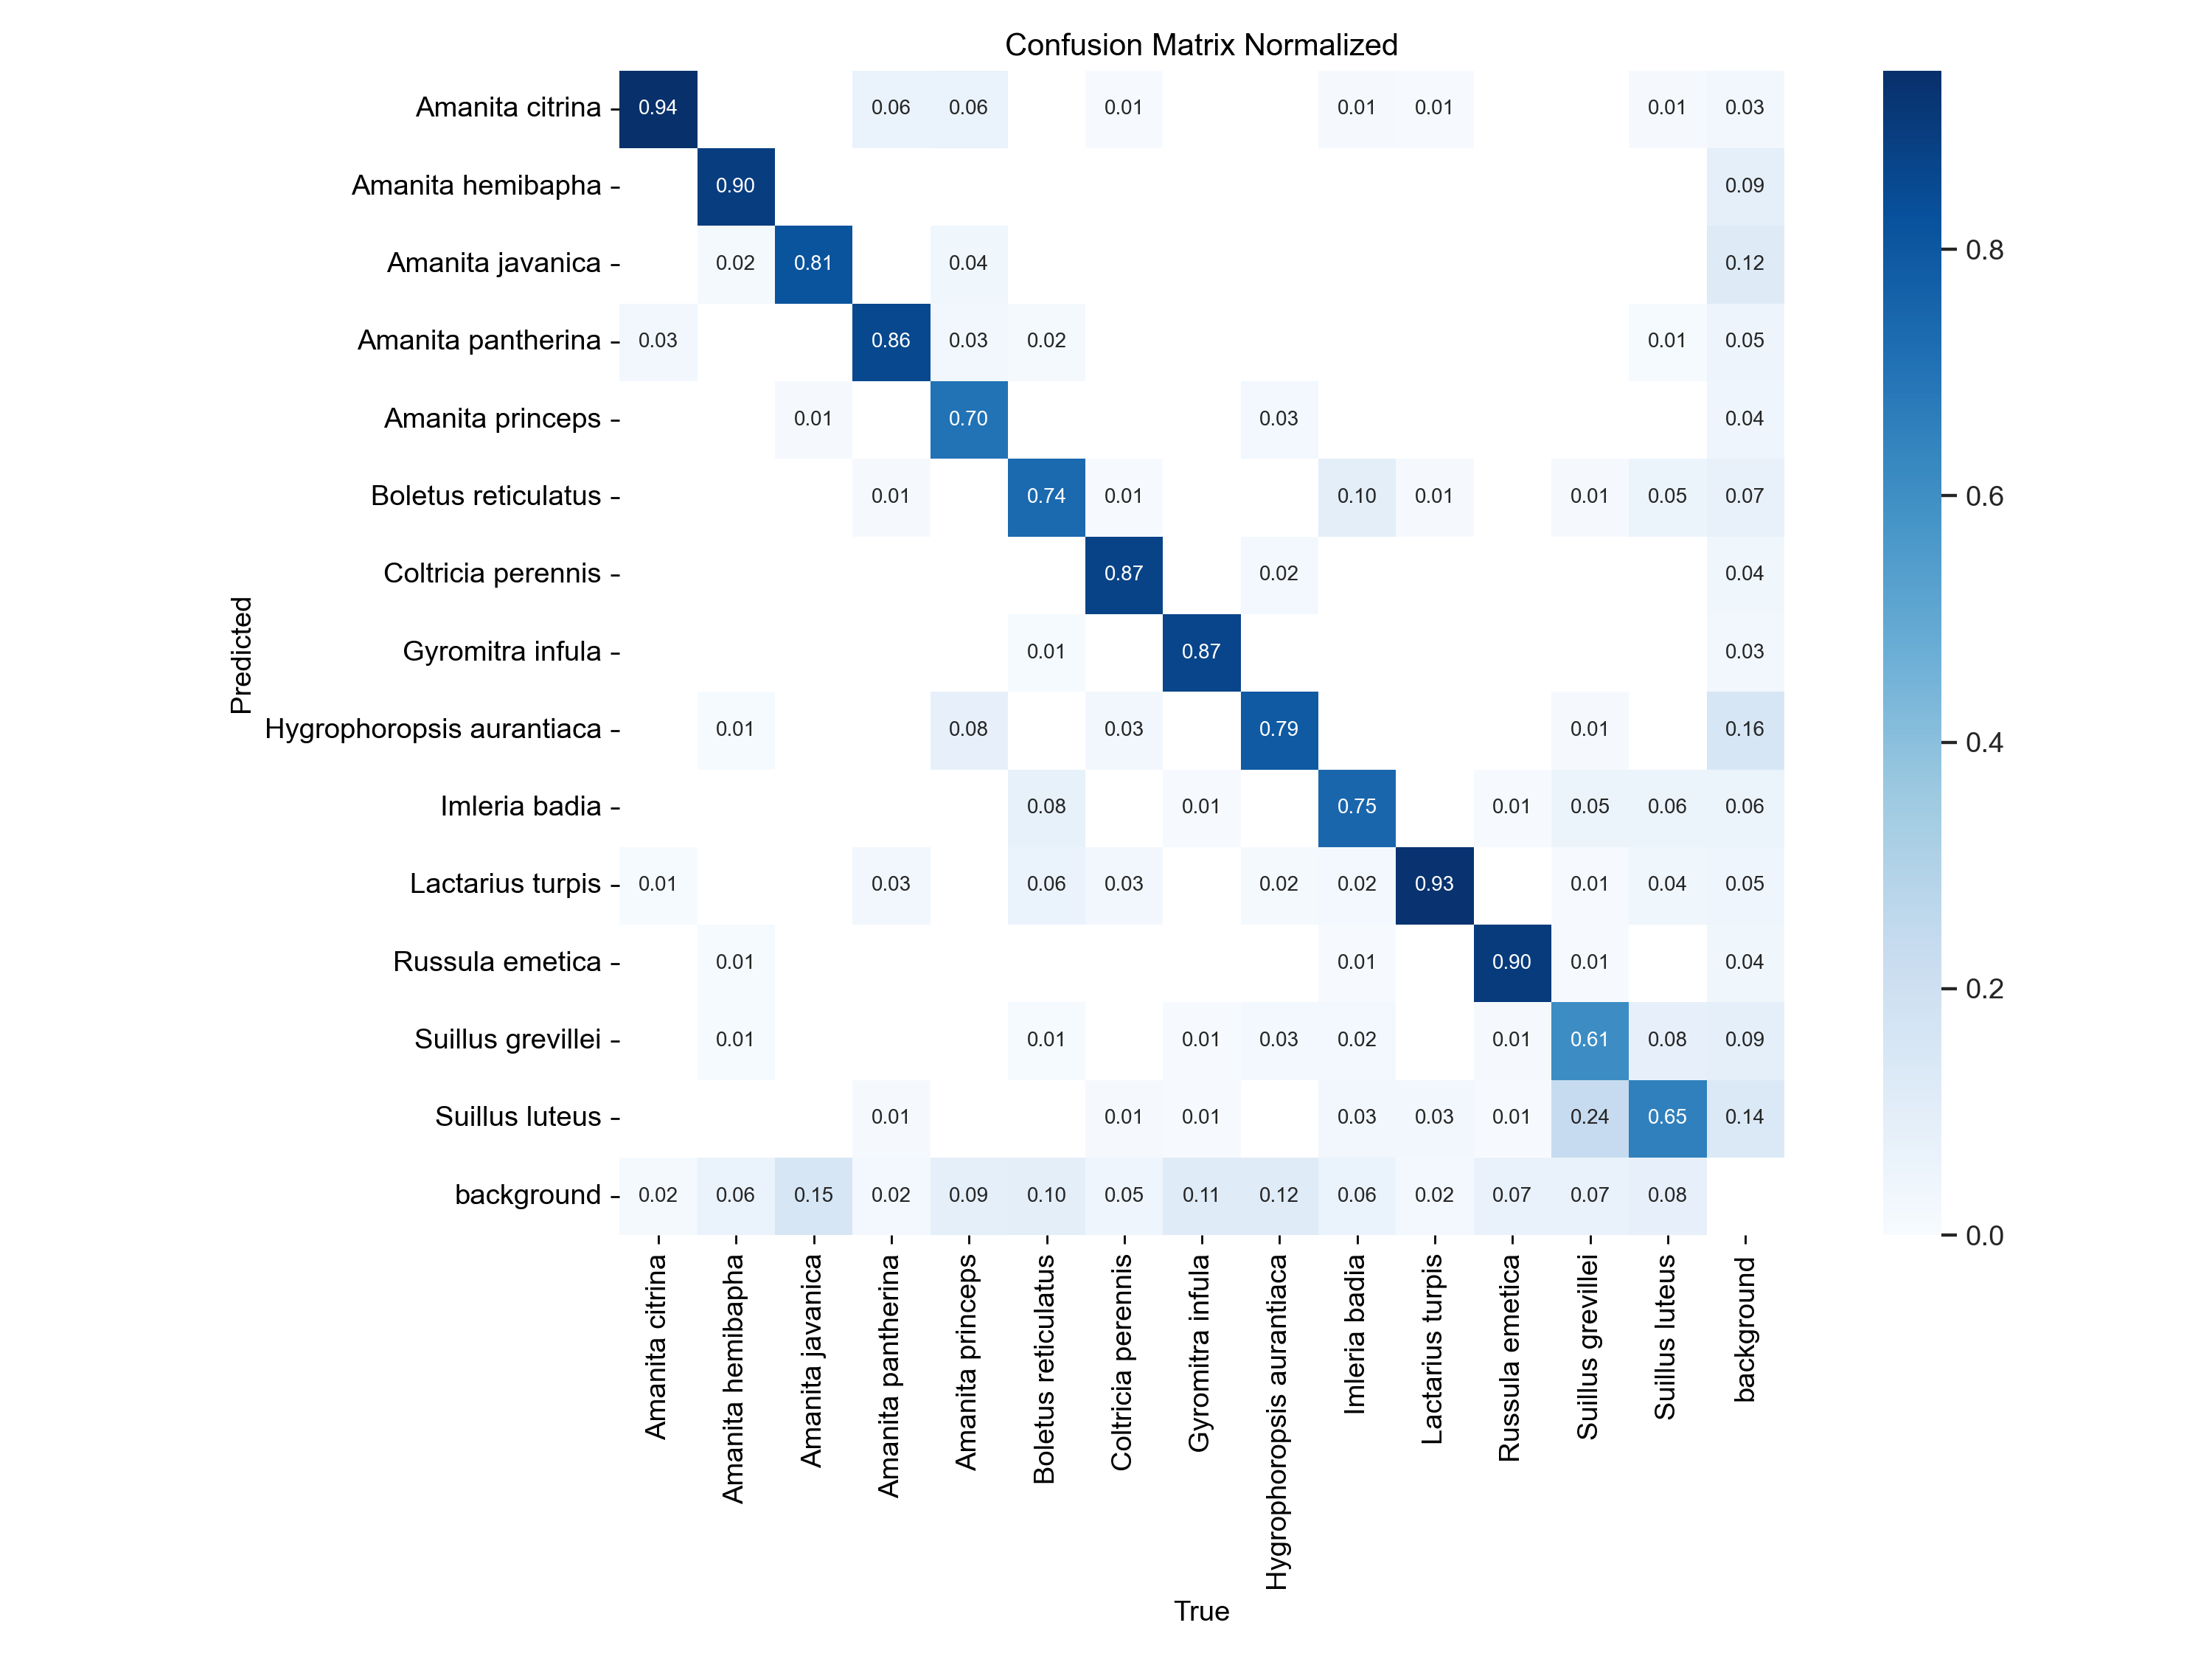

In [3]:
#Matrix for model in train15 with 14 epochs, 3 patience and the rest of the parameters being the same as the other models
%matplotlib inline
from PIL import Image

Image.open('runs/detect/val5/confusion_matrix_normalized.png')

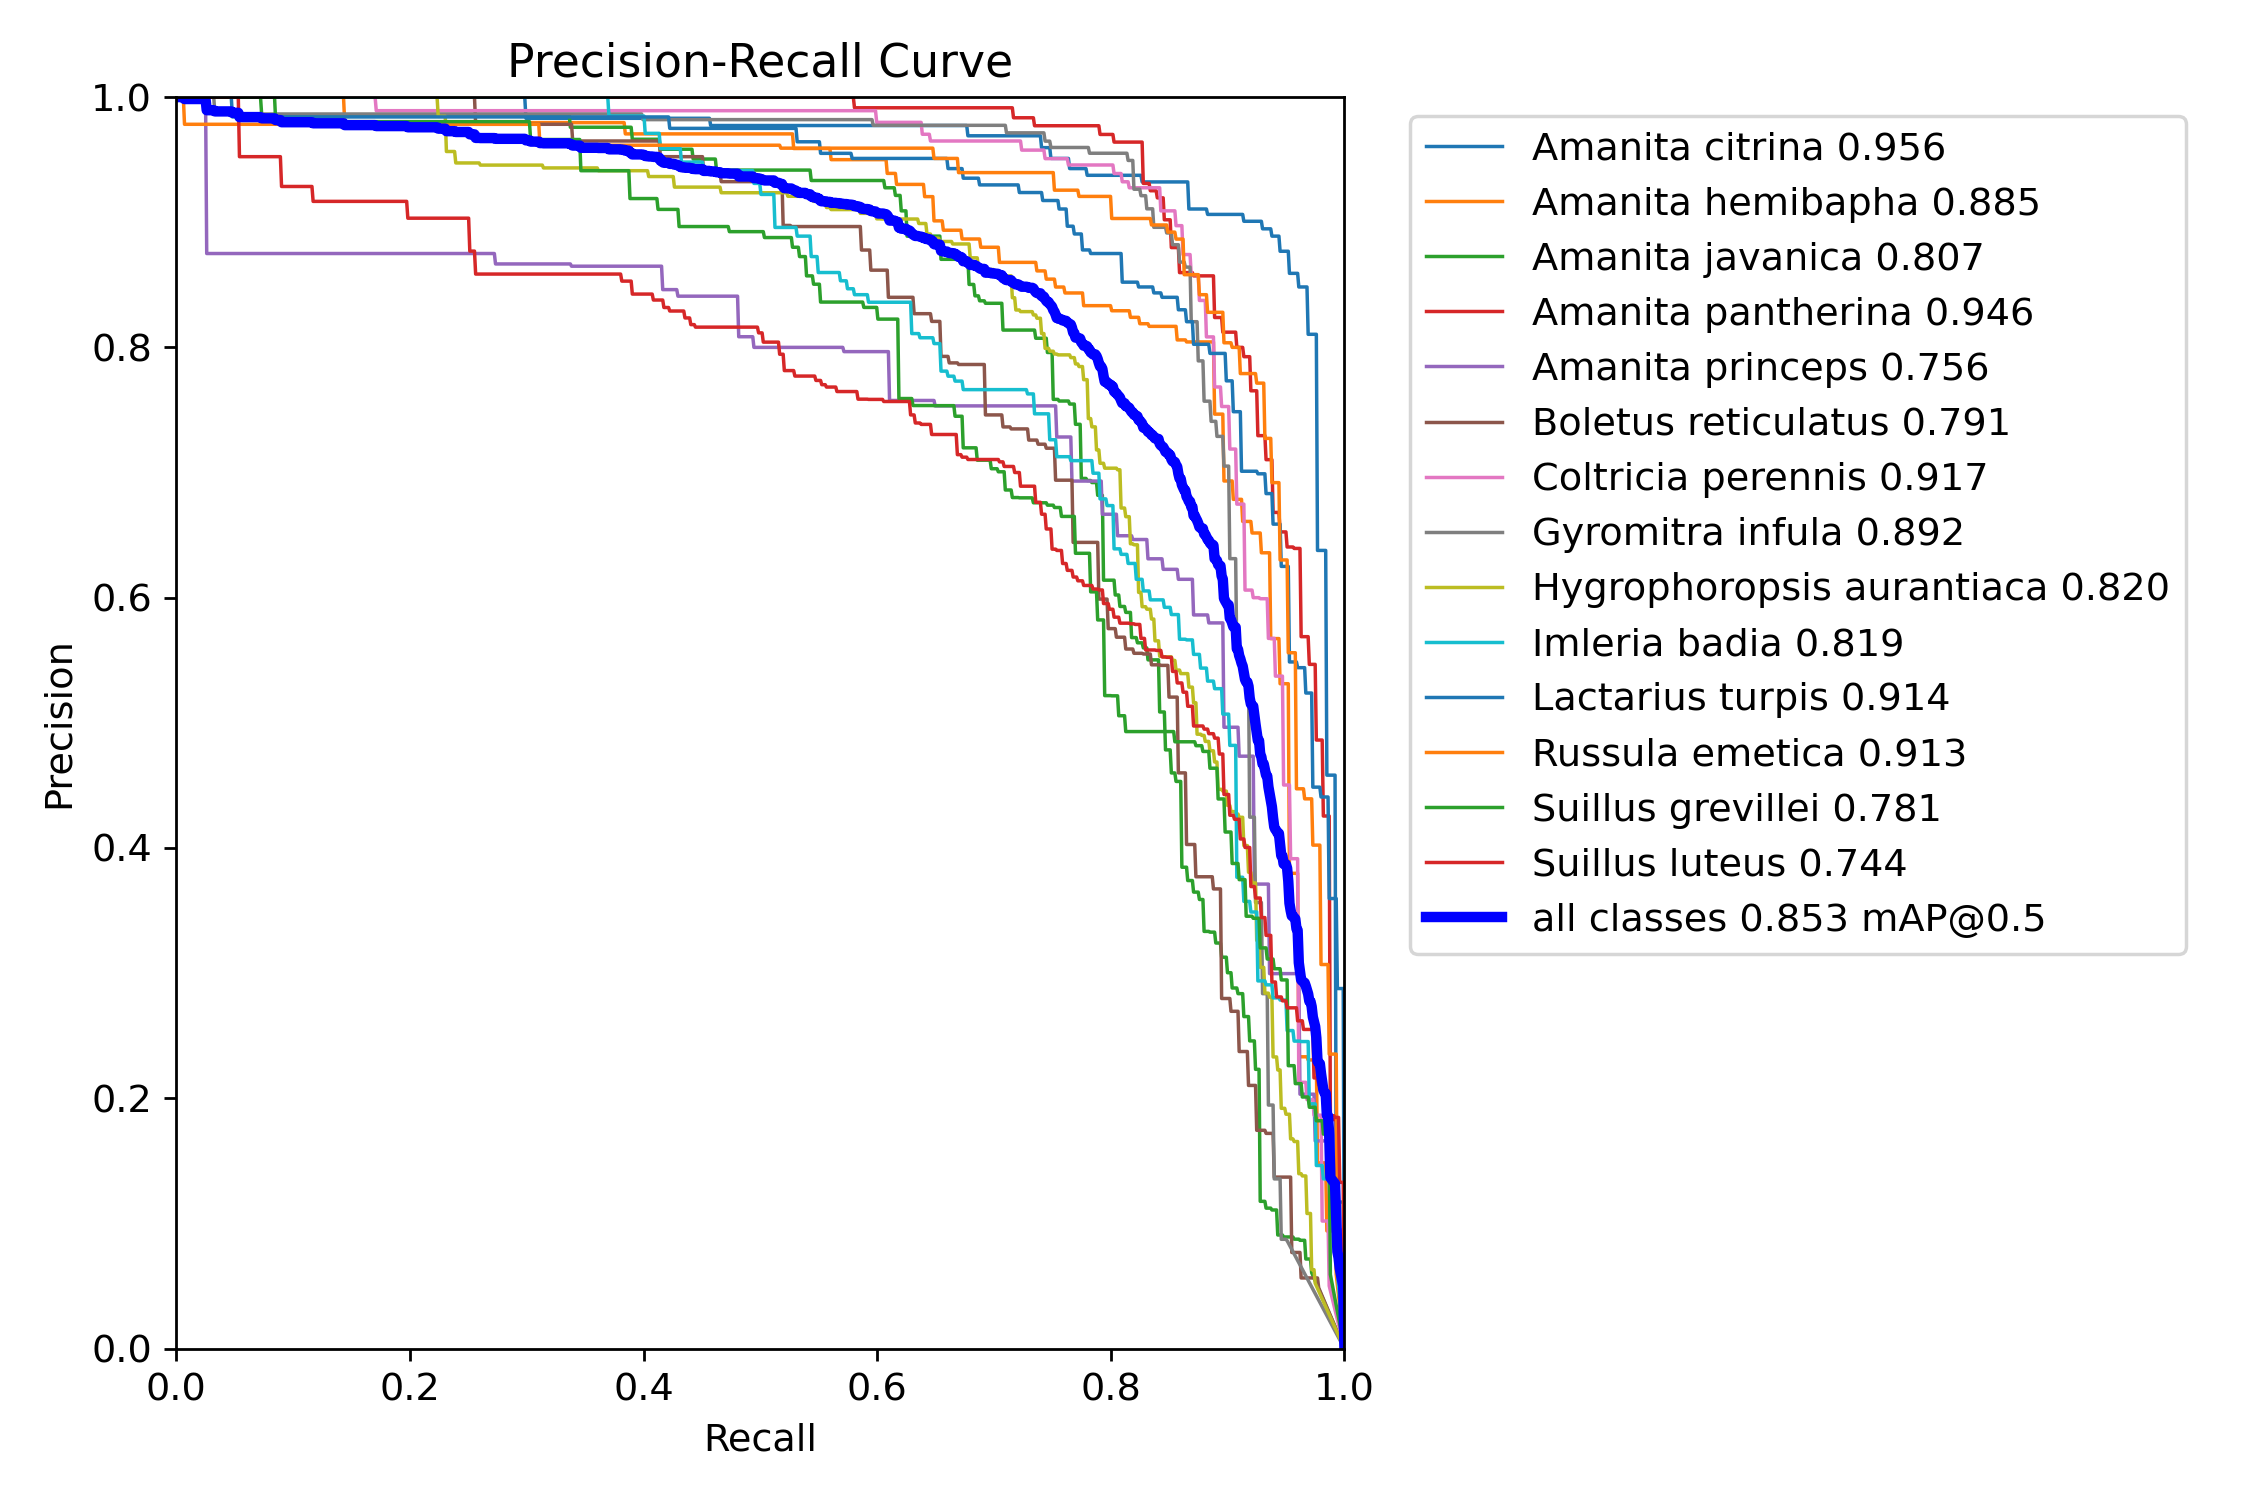

In [4]:
%matplotlib inline
from PIL import Image

Image.open('runs/detect/val5/PR_curve.png')